# SAVANT INVERSIONS
This notebook explores data and assigned tasks. 

In [ ]:
# imports
import csv, glob, os
from datetime import timedelta
import pandas as pd
import numpy as np              # for arrays
import math
#from netCDF4 import Dataset, num2date    # for netcdf
import matplotlib.pyplot as plt

In [49]:
data_folder = r'C:\Users\bm233557\Documents\Savant'

wind = pd.read_pickle('pickles/ALL_5Min_WIND.pkl')
temp = pd.read_pickle('pickles/ALL_5Min_TEMPS.pkl')
tke = pd.read_pickle('pickles/ALL_5Min_TKE.pkl')

In [78]:
def calc_inversion(t_h0, t_h1):
    '''If value is postive inversion, if value is negative convective'''
    return(t_h1 - t_h0)

def calc_windshear(spd_h0, spd_h1, dir_h0=None, dir_h1=None):
    """
    Calculate wind shear between two heights.

    Parameters:
        spd_h0: Wind speed at the lower height.
        spd_h1: Wind speed at the higher height.
        dir_h0*: Wind direction at the lower height (in degrees).
        dir_h1*: Wind direction at the higher height (in degrees).

    Returns:
        float: Wind shear magnitude if directions are not provided.
        tuple (float, float): Wind shear magnitude and direction if directions are provided.
    """
    if dir_h0 is None or dir_h1 is None:
        return(spd_h1 - spd_h0)
    else:
        dir_h0 = np.radians(dir_h0)
        dir_h1 = np.radians(dir_h1)
        
        u0 = spd_h0 * np.cos(dir_h0)
        v0 = spd_h0 * np.sin(dir_h0)
        v1 = spd_h1 * np.sin(dir_h1)
        u1 = spd_h1 * np.cos(dir_h1)
        
        du = u1 - u0
        dv = v1 - v0
        
        mag = np.sqrt(du**2 + dv**2)
        dir = np.atan2(dv, du)
        
        dir = np.degrees(dir)
        dir = (dir + 360) % 360
        
        return mag, dir
    


In [51]:
wind

,spd_15m_lconv,spd_4_5m_uconv,spd_6m_init,spd_4_5m_rel,spd_a2_1_5m_uconv,spd_10m_init,spd_10m_rel,spd_1_5m_init,spd_6m_uconv,spd_3m_rel,...,dir_20m_rel,dir_8_5m_rel,dir_3m_init,dir_8_5m_lconv,Dir_0_2m_init,Dir_0_2m_lconv,dir_a2_1_5m_rel,dir_a1_1_5m_rel,dir_1_5m_lconv,dir_10m_uconv
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-09-19 00:02:30,2.801124,1.946744,NaN,1.548332,1.242261,2.105322,2.976369,1.341517,2.143657,1.040035,...,47.997420,50.752953,60.067600,47.999340,75.996150,83.85983,93.206040,83.059460,NaN,NaN
2018-09-19 00:07:30,2.074617,2.004543,NaN,1.332703,1.226606,2.421815,2.339196,1.359306,2.322716,0.925853,...,38.579440,43.276585,52.619510,38.904343,75.773180,71.61550,89.887990,41.552850,NaN,NaN
2018-09-19 00:12:30,2.035027,2.001952,NaN,1.353867,1.318189,1.940816,2.264651,1.169998,2.292724,0.942766,...,31.145235,31.860464,47.016740,26.283623,75.023790,16.68713,72.001724,38.900100,NaN,NaN
2018-09-19 00:17:30,2.119224,1.985930,NaN,1.253130,1.254199,1.836548,2.113461,0.983641,2.243520,0.839483,...,29.604593,33.405243,48.353836,22.301638,79.359740,359.62779,91.211914,62.649662,NaN,NaN
2018-09-19 00:22:30,1.636118,1.602884,NaN,1.143981,0.970673,2.067900,2.046711,1.361216,1.803241,0.801813,...,41.235256,46.348503,58.997470,44.681380,76.637420,95.16602,101.698410,86.456955,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-28 20:52:30,NaN,NaN,3.550906,NaN,NaN,3.861297,NaN,2.692590,NaN,NaN,...,NaN,NaN,146.550610,NaN,144.714170,NaN,NaN,NaN,NaN,NaN
2018-11-28 20:57:30,NaN,NaN,2.656484,NaN,NaN,2.751916,NaN,2.014745,NaN,NaN,...,NaN,NaN,166.550400,NaN,165.043270,NaN,NaN,NaN,NaN,NaN
2018-11-28 21:02:30,NaN,NaN,2.953166,NaN,NaN,3.085890,NaN,2.321584,NaN,NaN,...,NaN,NaN,181.735140,NaN,184.840822,NaN,NaN,NaN,NaN,NaN


In [13]:
towers = ['init', 'rel', 'uconv', 'lconv']
wind.columns


Index(['spd_15m_lconv', 'spd_4_5m_uconv', 'spd_6m_init', 'spd_4_5m_rel',
       'spd_a2_1_5m_uconv', 'spd_10m_init', 'spd_10m_rel', 'spd_1_5m_init',
       'spd_6m_uconv', 'spd_3m_rel', 'spd_a2_1_5m_lconv', 'spd_4_5m_init',
       'spd_20m_lconv', 'spd_6m_rel', 'spd_1_5m_uconv', 'spd_6m_lconv',
       'Spd_0_2m_uconv', 'spd_10m_lconv', 'spd_15m_rel', 'spd_a2_1_5m_rel',
       'spd_4_5m_lconv', 'spd_3m_lconv', 'spd_1_5m_rel', 'spd_a1_1_5m_lconv',
       'spd_3m_uconv', 'Spd_0_2m_rel', 'spd_a1_1_5m_uconv', 'spd_20m_rel',
       'spd_8_5m_rel', 'spd_3m_init', 'spd_8_5m_lconv', 'Spd_0_2m_init',
       'Spd_0_2m_lconv', 'spd_a1_1_5m_rel', 'spd_1_5m_lconv', 'spd_10m_uconv',
       'dir_15m_lconv', 'dir_4_5m_uconv', 'dir_6m_init', 'dir_4_5m_rel',
       'dir_a2_1_5m_uconv', 'dir_10m_init', 'dir_10m_rel', 'dir_1_5m_init',
       'dir_6m_uconv', 'dir_3m_rel', 'dir_a2_1_5m_lconv', 'dir_4_5m_init',
       'dir_20m_lconv', 'dir_6m_rel', 'dir_1_5m_uconv', 'dir_6m_lconv',
       'Dir_0_2m_uconv', 'd

In [16]:
rel_wind = wind[[col for col in wind.columns if 'rel' in col]]
init_wind = wind[[col for col in wind.columns if 'init' in col]]
uconv_wind = wind[[col for col in wind.columns if 'lcon' in col]]
lconv_wind = wind[[col for col in wind.columns if 'ucon' in col]]

In [31]:
print((wind.index.max() - wind.index.min()).total_seconds()/300 +1)

for df in [rel_wind, init_wind, uconv_wind, lconv_wind]:
    print(len(df))

20415.0
20415
20415
20415
20415


In [80]:

for df in [rel_wind, init_wind, uconv_wind, lconv_wind]:
    spd_10m = [col for col in df.columns if 'spd_10m' in col]
    spd_1_5m = [col for col in df.columns if 'spd_1_5m' in col]
    dir_10m = [col for col in df.columns if 'dir_10m' in col]
    dir_1_5m = [col for col in df.columns if 'dir_1_5m' in col]
    print(spd_10m, spd_1_5m, dir_10m, spd_1_5m)
    shear_mag, shear_dir = calc_windshear(df[spd_1_5m], df[spd_10m], df[dir_1_5m], df[dir_10m])
    

['spd_10m_rel'] ['spd_1_5m_rel'] ['dir_10m_rel'] ['spd_1_5m_rel']
['spd_10m_init'] ['spd_1_5m_init'] ['dir_10m_init'] ['spd_1_5m_init']
['spd_10m_lconv'] ['spd_1_5m_lconv'] ['dir_10m_lconv'] ['spd_1_5m_lconv']
['spd_10m_uconv'] ['spd_1_5m_uconv'] ['dir_10m_uconv'] ['spd_1_5m_uconv']


In [81]:
rel_wind.columns

Index(['spd_4_5m_rel', 'spd_10m_rel', 'spd_3m_rel', 'spd_6m_rel',
       'spd_15m_rel', 'spd_a2_1_5m_rel', 'spd_1_5m_rel', 'Spd_0_2m_rel',
       'spd_20m_rel', 'spd_8_5m_rel', 'spd_a1_1_5m_rel', 'dir_4_5m_rel',
       'dir_10m_rel', 'dir_3m_rel', 'dir_6m_rel', 'dir_15m_rel',
       'dir_1_5m_rel', 'Dir_0_2m_rel', 'dir_20m_rel', 'dir_8_5m_rel',
       'dir_a2_1_5m_rel', 'dir_a1_1_5m_rel', 'Shear_Magnitude',
       'Shear_Direction'],
      dtype='object')

In [82]:
rel_wind['Shear_Magnitude'].describe()

count    17661.000000
mean         1.606028
std          0.804055
min          0.008659
25%          1.105411
50%          1.517792
75%          1.980738
max         29.912025
Name: Shear_Magnitude, dtype: float64

In [83]:
def filter_by_datetiem(df, start_datetime, end_datetime):
    """Filters a pandas DF with a datetime index to include rows...

    Args:
        df (pd.DataFrame): _description_
        start_datetime (str or pd.Timestamp): _description_
        end_datetime (str or pd.Timestamp): _description_
    """
    start_datetime = pd.to_datetime(start_datetime)
    end_datetime = pd.to_datetime(end_datetime)
    
    filtered_df = df[(df.index >= start_datetime) & (df.index <= end_datetime)]
    
    return filtered_df



In [84]:
filtered_rel = filter_by_datetiem(rel_wind, '2018-09-19 00:22:30', '2018-09-20 00:22:30')

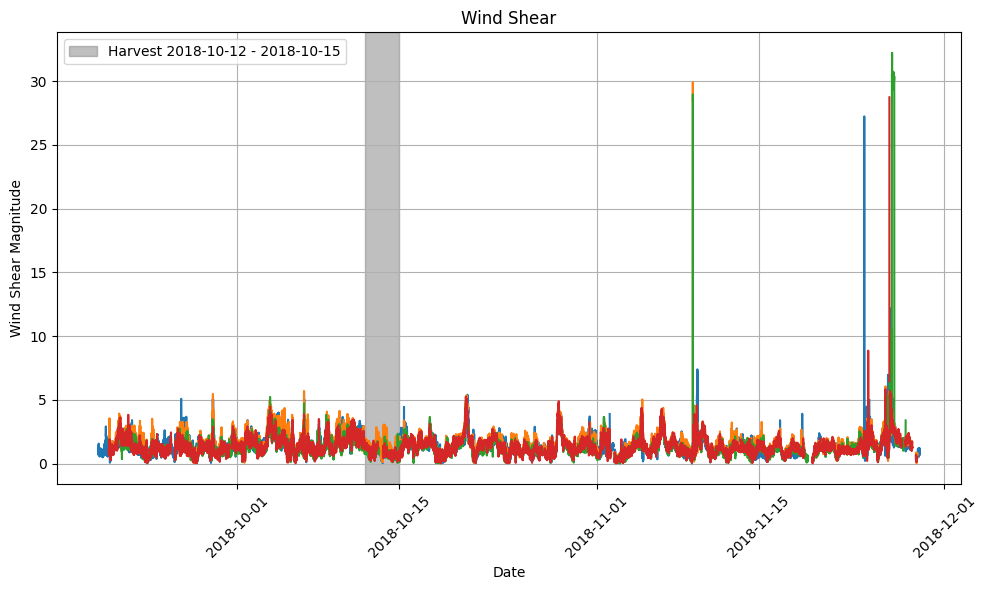

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(init_wind.index, init_wind['Shear_Magnitude'])
plt.plot(rel_wind.index, rel_wind['Shear_Magnitude'])
plt.plot(uconv_wind.index, uconv_wind['Shear_Magnitude'])
plt.plot(lconv_wind.index, lconv_wind['Shear_Magnitude'])

harvest_start = '2018-10-12'
harvest_end = '2018-10-15'
plt.axvspan(harvest_start, harvest_end, color='grey', alpha=0.5, label=f'Harvest {harvest_start} - {harvest_end}')

# Formatting the plot
plt.title('Wind Shear')
plt.xlabel('Date')
plt.ylabel('Wind Shear Magnitude')
plt.grid(True)
plt.legend()  # To show labels for each line
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


C:\Users\bm233557\AppData\Local\Temp\ipykernel_10452\2803077145.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 2000x600 with 0 Axes>

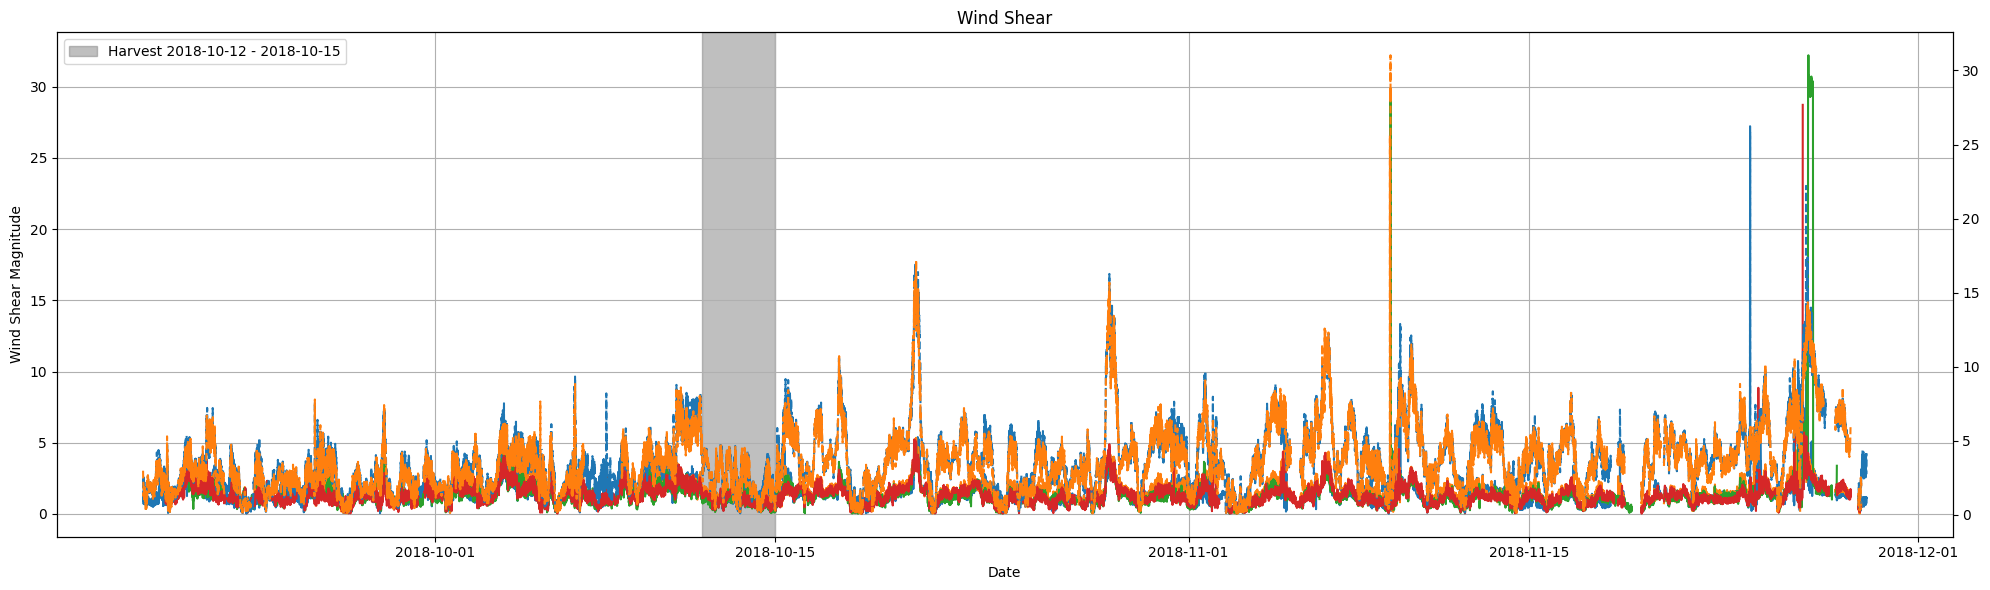

In [123]:
fig = plt.figure(figsize=(20, 6))
fig, ax1 = plt.subplots(figsize=(20,6))

ax1.plot(init_wind.index, init_wind['Shear_Magnitude'])
ax1.plot(init_wind.index, rel_wind['Shear_Magnitude'])
ax1.plot(init_wind.index, uconv_wind['Shear_Magnitude'])
ax1.plot(init_wind.index, lconv_wind['Shear_Magnitude'])

harvest_start = '2018-10-12'
harvest_end = '2018-10-15'
ax1.axvspan(harvest_start, harvest_end, color='grey', alpha=0.5, label=f'Harvest {harvest_start} - {harvest_end}')



# Formatting the plot
ax1.set_title('Wind Shear')
ax1.set_xlabel('Date')
ax1.set_ylabel('Wind Shear Magnitude')
ax1.grid(True)
ax1.legend()  # To show labels for each line
#ax1.set_xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(init_wind.index, init_wind['spd_10m_init'], '--')
ax2.plot(rel_wind.index, rel_wind['spd_10m_rel'], '--')
#ax2.plot(uconv_wind.index, uconv_wind['spd_10m_uconv'])
#ax2.plot(lconv_wind.index, lconv_wind['spd_10m_lconv'])

fig.tight_layout()
fig.show()